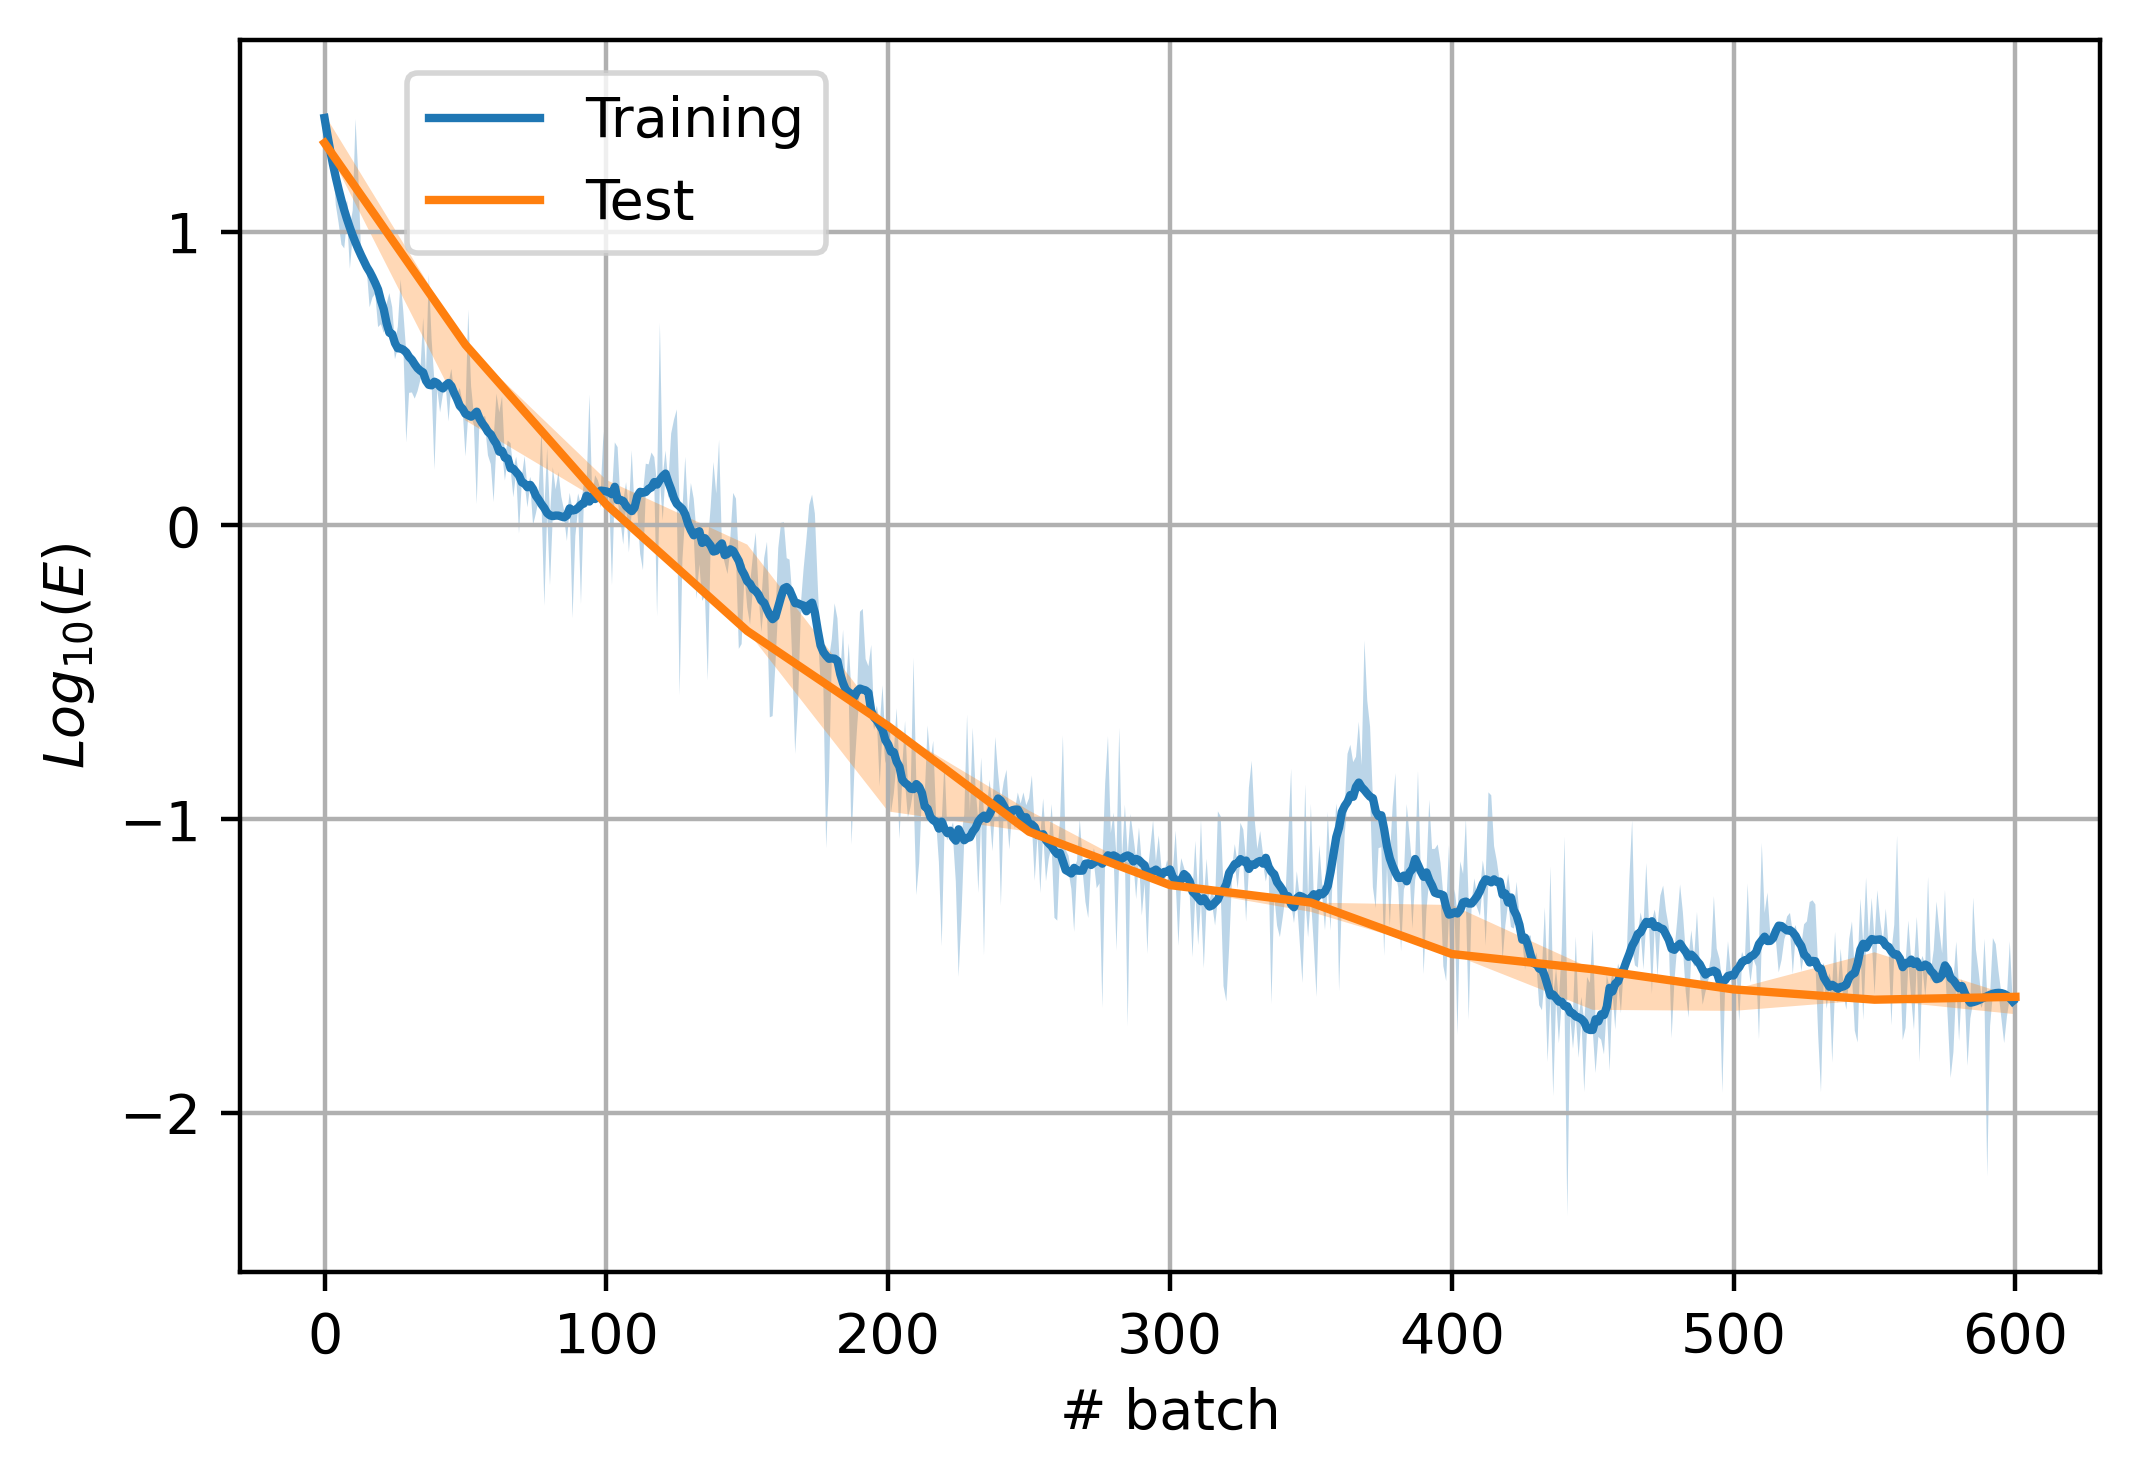

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from scipy.signal import savgol_filter

train = pd.read_csv("/Users/lizhehao/Desktop/Rendering/bottle-flip-robot/train_result.csv")
test = pd.read_csv("/Users/lizhehao/Desktop/Rendering/bottle-flip-robot/test_result.csv")
train_np = np.genfromtxt("../pySPlisHSPlasH/research/selectedRuns/bottle-flip-robot/train_result.csv", delimiter=',')
test_np = np.genfromtxt("../pySPlisHSPlasH/research/selectedRuns/bottle-flip-robot/test_result.csv", delimiter=',')
# train["Value"] = np.log10(train["Value"])
# test["Value"] = np.log10(test["Value"])

train_data = np.log10(train_np[1:601,2])
test_data = np.log10(test_np[1:,2])
train_step = train_np[1:601,1]
test_step = test_np[1:,1]

window_size = 31
order = 3
test_smooth = savgol_filter(test_data, 7, order)
train_smooth = savgol_filter(train_data, window_size, order)

train = train[:601]

plt.figure(figsize=(6,4), dpi=400)
plt.grid(True)
plt.yticks(np.arange(-3, 2, 1))

plt.plot(train_step, train_smooth, label = 'Training')
plt.fill_between(train_step, np.minimum(train_data, train_smooth), np.maximum(train_data, train_smooth), alpha=0.3)
plt.plot(test_step, test_smooth, label = 'Test')
plt.fill_between(test_step, np.minimum(test_data, test_smooth), np.maximum(test_data, test_smooth), alpha=0.3)

# plt.legend(fontsize = 8)
plt.ylabel("$Log_{10}(E)$")
plt.xlabel("# batch")
plt.legend(loc='center right',bbox_to_anchor=(0.33, 0.9))
  #            hue=optimizer_validation).set_title("accuracy")